<a href="https://colab.research.google.com/github/ChenHY1217/Projects-In-MLAI/blob/main/ProjectsInMLAIhw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Implementation

## Task 1 - Advanced Objective Function and Use Case

### Derive with MLE
To derive the objective function for Logistic Regression, we consider the Maximum likelihood estimation (MLE).

Since we are working with logistic regression which uses the sigmoid function to model the probility of a sample data point x belonging to (y=1), we have $h_w(x) = 1 / (1 + e^{-w^T x})$.

From here, since this is binary classification, we consider a Bernoulli distribution. We know that for $y=1$, $P(y|x;w) = h_w(x)$ and for $y=0$, $P(y|x;w) = 1 - h_w(x)$.

This can be combined into $P(y|x;w) = (h_w(x))^y(1 - h_w(x))^{1-y})$.

Now we take the likelihood function, apply the logarithm transform and substitute in the probability expression for logistic regression to get:

$l(w) = log(L(w)) = ∑_{i=1}^n [y_ilog(h_w(x_i))+(1-y_i)log(1-h_w(x_i))]$

Now we want to find the objective function or the cost / error function that we want to minimize. This is the same as minimizing the negative of the likelihood function above, aka the NLL (negative log-likelihood).

Therefore our objective function is:

$E(w) = -\frac{1}{N}∑_{i=1}^n [y_ilog(h_w(x_i))+(1-y_i)log(1-h_w(x_i))]$

and we seek to minimize this by finding the optimal w (if we want to average the results, we can add an $1/N$ to the front of the summation).



### MAP technique for Logistic Regression

MLE seeks to find the parameter w that maximizes the likelihood of the data: $P(y|x;w)$. This assumes that we have no prior knowledge about the distribution of the weights w. The risk here is that we are prone to overfitting because we are trying to fit the training data perfectly, especially if the dataset is small.

MAP (Maximum A Posteriori) however, seeks to find the posterior probability: $P(w | y; x)$. Using Bayes' Theorem, we get that this is proportional to $P(y|x;w) * P(w)$ or the likelihood times the prior.

The key difference here is MAP incorporates a prior belief on the weights before seeing the data and therefore regularizes and reduces overfitting.

Citations:

* https://medium.com/@devcharlie2698619/the-intuition-behind-maximum-likelihood-estimation-mle-and-maximum-a-posteriori-estimation-map-b8ba1ba1078f




### Define a Logistic Regression ML Problem

One such machine learning problem would be credit card fraud detection. In determining whether a transaction is fraud (1) or not fraud (0), we can apply Logistic Regression to get a probabilistic prediction. This is great for calculating risks and for determining whether a credit card should be instantly shut down or just notify the user.

Logistic Regression is the best choice here because in fraud detection, a simple yes/no is insufficient. We would need to set certain thresholds for decisions and the probabilities that Logistic Regression outputs are best suited for this. We are also able to see which features contribute the most to fraud by examining the weights.

We can compare this to the linear model / linear classification model defined in class. The Linear classification model is capable of classifying but it is only able to give either a yes or no. This is insufficient for this matter as a probabilistic output is more useful.

The following dataset gathered from Kaggle contains data regarding credit card transactions and their classifications. Due to a PCA transformation, we are not able to access the original features, but instead are provided with V1 - V28 features as well as feature 'Time' which contains the seconds elapsed between each transaction and the first transaction in the dataset and feature 'Amount' which is the transaction Amount.

Below are the correspondence to the MLE derivation:

$x_i$: this is the i-th transaction in the dataset and is a vector including each feature.

$y_i$: this is the target label for the i-th transaction with 1 being fraudulent and 0 being legit.

$w$: this is the weights to be learned by the model with $w_j$ being the weight associated with feature j and $w_0$ being the bias.

$h_w(x_i)$: the predicted probability that transaction i is fraudulent using the sigmoid function.

$N$: size of the dataset or total number of transactions.

A couple assumptions to be noted:

We assume the data is I.I.D, the relationship between the features and the log-odds of being fraud is linear, and that their is no multicollinearity.


## Task 2 - Dataset and Advanced EDA

### Selecting the Dataset

We will be using the following dataset from Kaggle on credit card fraud detection.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

### EDA

We will be performing EDA on this dataset. The following code involves calculating VIF and visualizing the relations between features through plots and heatmaps.



Importing Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# load dataset
df = pd.read_csv(path + "/creditcard.csv")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [3]:
# Quick stats
print(df.head())
print(df.describe())

print(df.isnull().sum().max())

# Scale the "Amount" and "Time" feature to match the other features
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original "Amount" and "Time" columns
df_scaled = df.drop(['Time', 'Amount'], axis=1)

print(df_scaled.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Note that there is no missing values in the dataset. Note that "Amount" and "Time" has much larger numbers compared to the other features, so we perform rescaling.

After calculating the VIF values for each feature, we discover that "Amount" has a high VIF value exceeding 10, therefore we need to eliminate this feature that has high multicollinearity. This is likely due to the other PCA components having high correlation to the actual amount in the transaction, such as types of transactions.

EDA - VIF

In [4]:
df_final = df_scaled.drop(['Amount_Scaled'], axis=1)

# drop Class (label) for VIF calculation
features = df_final.drop(['Class'], axis=1)

# calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns

print(vif)

    VIF Factor     features
0     1.025906           V1
1     1.000211           V2
2     1.330979           V3
3     1.020827           V4
4     1.056305           V5
5     1.007464           V6
6     1.013490           V7
7     1.002566           V8
8     1.000141           V9
9     1.001762          V10
10    1.115321          V11
11    1.029065          V12
12    1.008164          V13
13    1.018333          V14
14    1.063262          V15
15    1.000266          V16
16    1.010099          V17
17    1.015374          V18
18    1.001578          V19
19    1.004863          V20
20    1.003762          V21
21    1.039010          V22
22    1.004916          V23
23    1.000492          V24
24    1.102120          V25
25    1.003223          V26
26    1.000050          V27
27    1.000167          V28
28    1.879717  Time_Scaled


EDA - Visualization

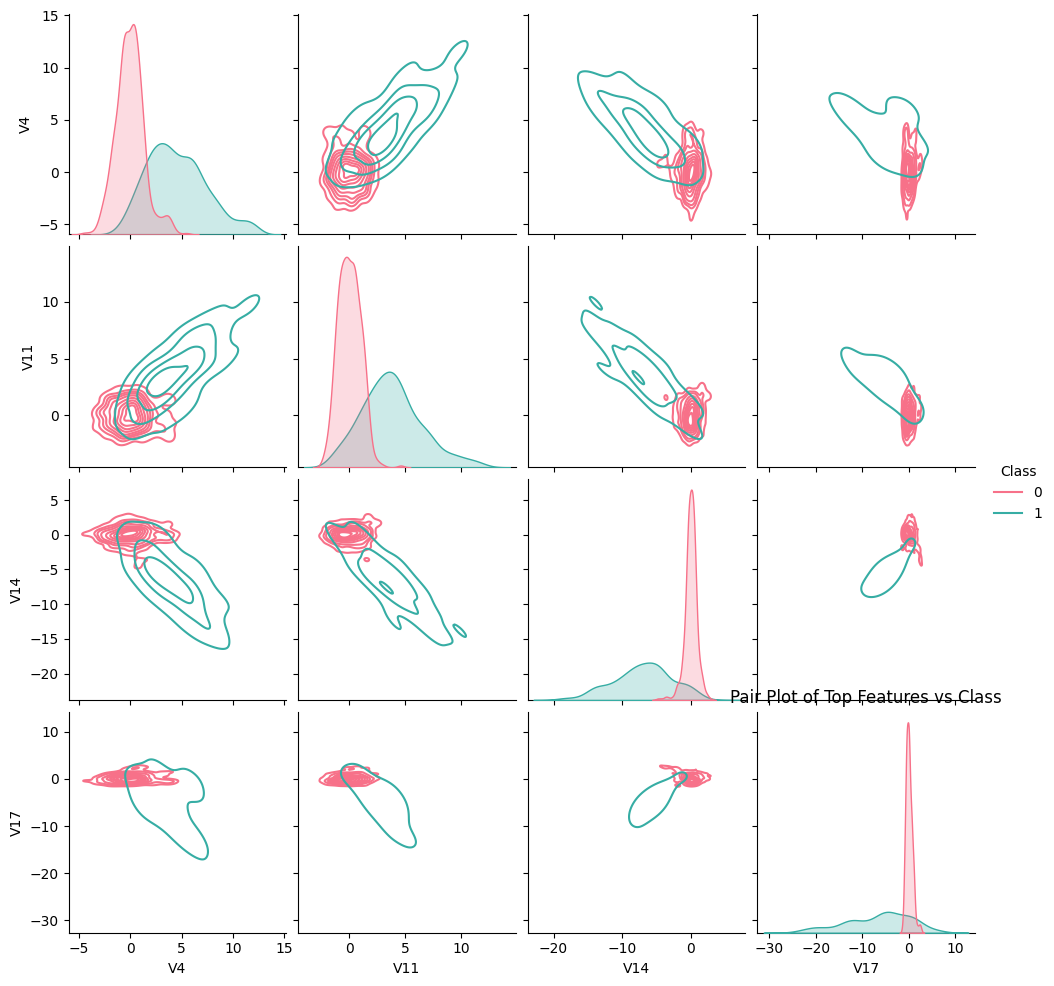

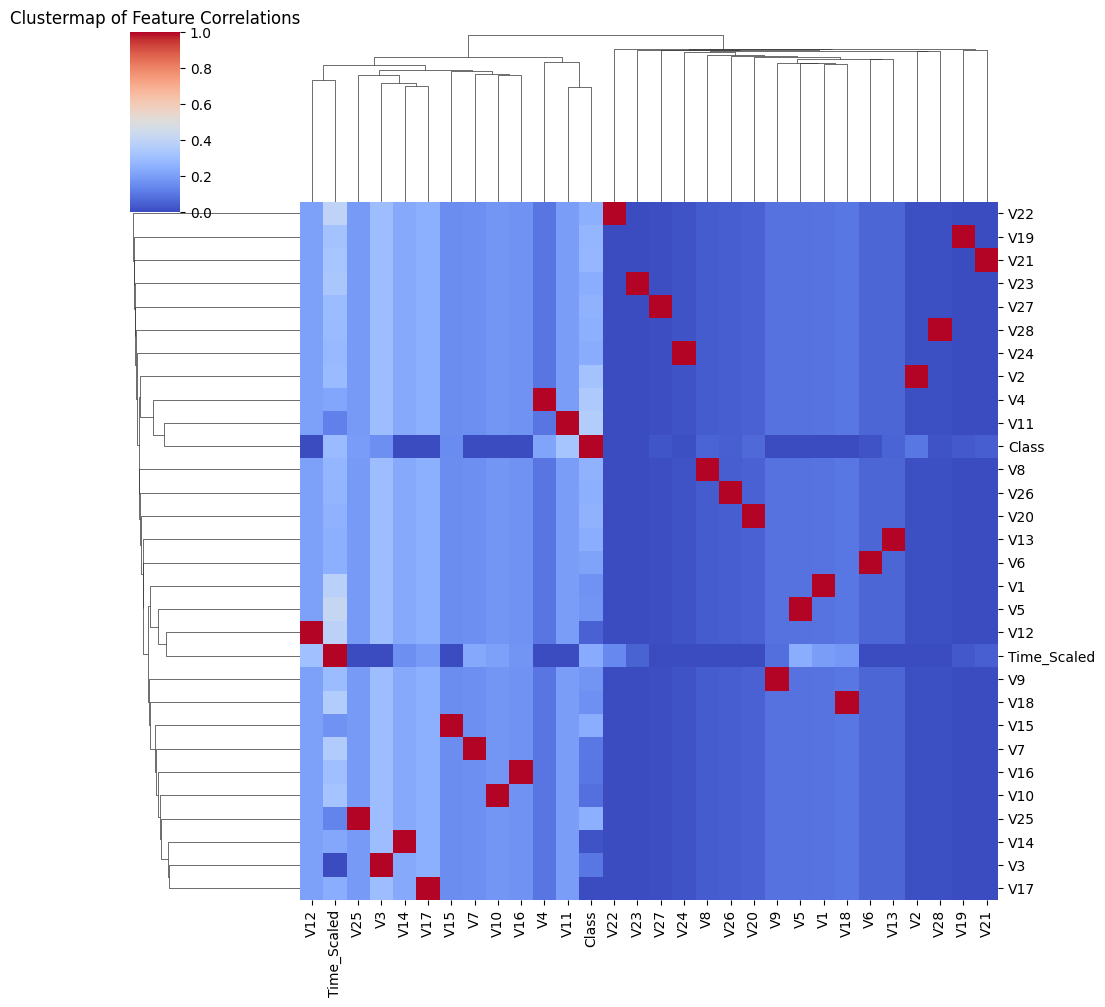

In [5]:
# Pair Plots with KDE

# take sample
df_fraud = df_final[df_final['Class'] == 1]
df_normal = df_final[df_final['Class'] == 0].sample(n=492, random_state=42)

sample_df = pd.concat([df_fraud, df_normal])

features_to_plot = ['V4', 'V11', 'V14', 'V17', 'Class']

# plotting pair plot
sns.pairplot(sample_df[features_to_plot], hue='Class', kind='kde', palette='husl')
plt.title('Pair Plot of Top Features vs Class')
plt.show()

# Heatmap with Clustering
# correlation matrix
corr = df_final.corr()
sns.clustermap(corr, cmap="coolwarm", standard_scale=1)
plt.title('Clustermap of Feature Correlations')
plt.show()


Notice in the pair plots, the two colors are clearly separated, indicating that these corresponding features are good predictors. It also suggests that a linear decision boundary shoud be able to effectively separate these classes.

Meanwhile, in the heatmap, most of it is blue which is expected from the PCA transformation. This indicates that multicollinearity is not a significant concern, though Amount and Time should be monitored.

## Task 3 - Logistic Regression Implementation

Below is the implementation of three variants of Logistic Regression: Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent.

In [6]:
# Logistic Regression

import numpy as np
import matplotlib.pyplot as plt

# Let's make a class for LR
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000, add_bias=True):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.add_bias = add_bias
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def add_bias_term(self, X):
        bias_term = np.ones((X.shape[0], 1))
        return np.hstack((bias_term, X))

    def cost_function(self, y_true, y_pred): # objective function
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        N = len(y_true)
        return (-1 / N) * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).T, np.log(1 - y_pred)))

    def fit(self, X, y, method="batch", batch_size=64):
        # method can be "batch", "stochastic", or "mini-batch"
        if self.add_bias:
            X = self.add_bias_term(X)

        m, n = X.shape
        self.weights = np.zeros(n)
        self.cost_history = []

        for i in range(self.num_iterations):

            # Batch Gradient Descent
            if method == "batch":
                y_pred = self.sigmoid(np.dot(X, self.weights))
                grad = (1 / m) * np.dot(X.T, (y_pred - y))
                self.weights -= self.learning_rate * grad

                cost = self.cost_function(y, y_pred)
                self.cost_history.append(cost)

            # Stochastic Gradient Descent
            elif method == "stochastic":

                rand_ind = np.random.randint(0, m)
                xi = X[rand_ind, :].reshape(1, n)
                yi = y[rand_ind]

                y_pred = self.sigmoid(np.dot(xi, self.weights))
                grad = np.dot(xi.T, (y_pred - yi))
                self.weights -= self.learning_rate * grad

                y_pred_all = self.sigmoid(np.dot(X, self.weights))
                cost = self.cost_function(y, y_pred_all)
                self.cost_history.append(cost)

            # Mini-Batch Gradient Descent
            elif method == "mini-batch":

                inds = np.random.permutation(m)
                X_shuffled = X[inds]
                y_shuffled = y[inds]

                for j in range(0, m, batch_size):
                    xi = X_shuffled[j:j+batch_size]
                    yi = y_shuffled[j:j+batch_size]

                    if len(yi) < batch_size:
                        continue

                    y_pred = self.sigmoid(np.dot(xi, self.weights))
                    grad = np.dot(xi.T, (y_pred - yi)) / batch_size
                    self.weights -= self.learning_rate * grad

                    y_pred_all = self.sigmoid(np.dot(X, self.weights))
                    cost = self.cost_function(y, y_pred_all)
                    self.cost_history.append(cost)

            elif method == "mini-batch-for-comparison":
                inds = np.random.permutation(m)
                X_shuffled = X[inds]
                y_shuffled = y[inds]

                for j in range(0, m, batch_size):
                    xi = X_shuffled[j:j+batch_size]
                    yi = y_shuffled[j:j+batch_size]

                    if len(yi) < batch_size:
                        continue

                    y_pred = self.sigmoid(np.dot(xi, self.weights))
                    grad = np.dot(xi.T, (y_pred - yi)) / batch_size
                    self.weights -= self.learning_rate * grad

                y_pred_all = self.sigmoid(np.dot(X, self.weights))
                cost = self.cost_function(y, y_pred_all)
                self.cost_history.append(cost)

    def predict_prob(self, X):
        if self.add_bias:
            X = self.add_bias_term(X)
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

Splitting into Training and Test Datasets

In [7]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Class', axis=1).values
y = df_final['Class'].values

# Stratified Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (227845, 29)
Testing shape: (56962, 29)


Running the Implementation, Plotting, and Comparisons

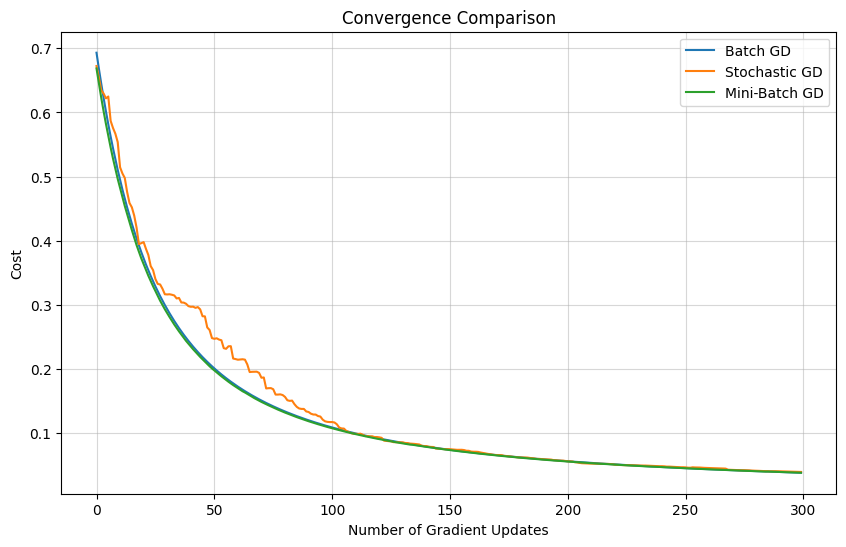

In [8]:
# Train Batch
model_batch = LogisticRegression(learning_rate=0.1, num_iterations=500)
model_batch.fit(X, y, method='batch')

# Train SGD
model_sgd = LogisticRegression(learning_rate=0.1, num_iterations=500)
model_sgd.fit(X, y, method='stochastic')

# Train Mini-Batch
model_mini = LogisticRegression(learning_rate=0.1, num_iterations=1)
model_mini.fit(X, y, method='mini-batch', batch_size=64)

# Plotting
limit = 300
plt.figure(figsize=(10, 6))
plt.plot(model_batch.cost_history[:limit], label='Batch GD')
plt.plot(model_sgd.cost_history[:limit], label='Stochastic GD')
plt.plot(model_mini.cost_history[:limit], label='Mini-Batch GD')
# plt.xscale('log')

plt.title('Convergence Comparison')
plt.xlabel('Number of Gradient Updates')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

Batch Gradient Descent exhibits a smooth decreasing curve in its cost with respect to each gradient update.

Stochastic Gradient Descent exhibits a more noisy, random curve. This curve sometimes goes up, but still follows a downward trend towards converging.

Mini-batch Gradient Descent is very similar to Batch Gradient Descent, with its smooth curve reaching convergence.

Note, during plotting, there were several issues with creating a meaningful plot. This is due to how the gradient updates were recorded during the iterations. For one epoch, mini-batch experienced 4000+ gradient updates. This required some rebalancing of how many iterations needed and zooming in on the plot.



## Task 4 - Optimization Techniques and Advanced Comparison

Optimization Algorithms

Momentum, RMSProp, Adam

The above algorithms will be implemented using Pytorch. It will then be compared to our vanilla Logistic Regression implementation from Task 3.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to tensor for pytorch optimizer
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1) # Reshape to (m, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [10]:
class LogisticRegressionPytorch(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionPytorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [11]:
# Training optimization algorithms with mini-batch GD
def train_model(optimizer_name, learning_rate=0.01, num_epochs=5):
    input_dim = X_train_tensor.shape[1]
    model = LogisticRegressionPytorch(input_dim)

    if optimizer_name == 'momentum':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    cost_history = []

    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)

            loss = nn.BCELoss()(outputs, batch_y)
            loss.backward()
            optimizer.step()

        cost_history.append(loss.item())

    return cost_history, model

Note that here we are implementing these optimization algorithms with mini-batch gradient descent and comparing it to mini-batch instead of pure SGD from Task 3. This is because pure SGD with a batch size of 1 yields noisy gradients that are detrimental for algorithms like Adam which calculate running averages of gradients. Therefore, a better comparison would be these algorithms and a SGD with slightly larger batch size aka mini-batch.

Each of the above algorithms is running with a batch size of 64.

### Running Implementations and compare with Vanilla SGD

Training PyTorch Momentum...
Training PyTorch RMSProp...
Training PyTorch Adam...


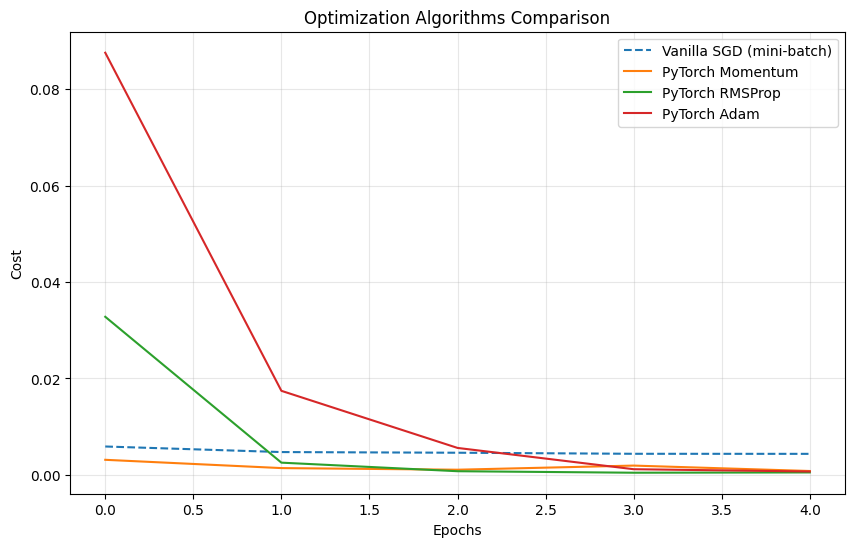

In [12]:
import matplotlib.pyplot as plt

epochs = 5
print("Training PyTorch Momentum...")
hist_momentum, momentum_model = train_model('momentum', learning_rate=0.01, num_epochs=epochs)

print("Training PyTorch RMSProp...")
hist_rms, rms_model = train_model('rmsprop', learning_rate=0.001, num_epochs=epochs)

print("Training PyTorch Adam...")
hist_adam, adam_model = train_model('adam', learning_rate=0.001, num_epochs=epochs)

model_base = LogisticRegression(learning_rate=0.1, num_iterations=5)
model_base.fit(X, y, method='mini-batch-for-comparison', batch_size=64)
hist_base = model_base.cost_history[:epochs]

plt.figure(figsize=(10, 6))
plt.plot(hist_base, label='Vanilla SGD (mini-batch)', linestyle='--')
plt.plot(hist_momentum, label='PyTorch Momentum')
plt.plot(hist_rms, label='PyTorch RMSProp')
plt.plot(hist_adam, label='PyTorch Adam')

plt.title('Optimization Algorithms Comparison')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The plot demonstrates that Adam outperforms all the other algorithms with its rapid decline and fast convergence speed. RMSProp and Momentum also served to be an improvement on Vanilla SGD.

### Defining Evaluating Metrics

We will consider three metrics to analyze and interpret the results of each optimization algorithm: precision, recall, and F1 score.

Precision = True Positives / predicted True

Recall = True Positives / actual True

F1 Score = 2 * (precision * recall) / (precision + recall)

citations:
* https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test, threshold=0.5):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = (y_pred >= threshold).float()

    y_pred_np = y_pred.cpu().numpy()
    y_test_np = y_test.cpu().numpy()

    precision = precision_score(y_test_np, y_pred_np, zero_division=0)
    recall = recall_score(y_test_np, y_pred_np, zero_division=0)
    f1 = f1_score(y_test_np, y_pred_np, zero_division=0)

    cm = confusion_matrix(y_test_np, y_pred_np)

    return precision, recall, f1, cm

precision, recall, f1, cm = evaluate_model(momentum_model, X_test_tensor, y_test_tensor)

print(f"--- Evaluation Results for Momentum")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

precion, recall, f1, cm = evaluate_model(rms_model, X_test_tensor, y_test_tensor)

print(f"--- Evaluation Results for RMSProp")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

precion, recall, f1, cm = evaluate_model(adam_model, X_test_tensor, y_test_tensor)

print(f"--- Evaluation Results for Adam")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

--- Evaluation Results for Momentum
Precision: 0.8382352941176471
Recall: 0.5816326530612245
F1 Score: 0.6867469879518072
Confusion Matrix:
[[56853    11]
 [   41    57]]
--- Evaluation Results for RMSProp
Precision: 0.8382352941176471
Recall: 0.6428571428571429
F1 Score: 0.7325581395348837
Confusion Matrix:
[[56853    11]
 [   35    63]]
--- Evaluation Results for Adam
Precision: 0.8382352941176471
Recall: 0.6020408163265306
F1 Score: 0.6982248520710059
Confusion Matrix:
[[56852    12]
 [   39    59]]


Interpretation of Results:

While all three models achieved the same precision, RMSProp achieved the highest recall. This means that RMSProp was able to catch more fraud cases than the other algorithms.

Meanwhile, the identical precision suggests that the decision boundary for determining the negatives is very distinct. This makes it easy for all three optimizers to find.

We expected Adam to perform the best since it is a combination of the other two methods, however in this case, it was slightly worst than RMSProp. This may be due to its extra complexity introducing noise in early stages of training and may require hyperparameter tuning.

### Hyperparameter Tuning

We will conduct a grid search to find the best hyperparameter for the optimization algorithms. The hyperparameter of interest is the learning rate.


citations:
* https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning/

In [14]:
import torch.optim as optim
import pandas as pd

learning_rates = [0.001, 0.01, 0.1]
optimizers = ['momentum', 'rmsprop', 'adam']
results = []

print(f"{'Optimizer':<10} {'LR':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 55)

for opt_name in optimizers:
    for lr in learning_rates:
        model = LogisticRegressionPytorch(input_dim=X_train_tensor.shape[1])
        criterion = nn.BCELoss()

        if opt_name == 'momentum':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
        elif opt_name == 'rmsprop':
            optimizer = optim.RMSprop(model.parameters(), lr=lr)
        elif opt_name == 'adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)

        model.train()
        for epoch in range(10):
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        prec, rec, f1, _ = evaluate_model(model, X_test_tensor, y_test_tensor)

        # Store results
        results.append({'Optimizer': opt_name, 'LR': lr, 'F1': f1, 'Precision': prec, 'Recall': rec})
        print(f"{opt_name:<10} {lr:<10} {prec:.4f}     {rec:.4f}     {f1:.4f}")

df_results = pd.DataFrame(results)
best_run = df_results.loc[df_results['F1'].idxmax()]

print("\n--- TUNING COMPLETE ---")
print(f"Best Configuration: {best_run['Optimizer']} with LR={best_run['LR']} (F1: {best_run['F1']:.4f})")

Optimizer  LR         Precision  Recall     F1        
-------------------------------------------------------
momentum   0.001      0.8143     0.5816     0.6786
momentum   0.01       0.8429     0.6020     0.7024
momentum   0.1        0.8247     0.8163     0.8205
rmsprop    0.001      0.8462     0.7857     0.8148
rmsprop    0.01       0.8367     0.8367     0.8367
rmsprop    0.1        0.7619     0.8163     0.7882
adam       0.001      0.8158     0.6327     0.7126
adam       0.01       0.8000     0.8163     0.8081
adam       0.1        0.7619     0.8163     0.7882

--- TUNING COMPLETE ---
Best Configuration: rmsprop with LR=0.01 (F1: 0.8367)


### Conclusion

After evaluating each algorithm and tuning, we discovered the following results.

In terms of computational complexity, Vanilla SGD is the cheapest per step, however it is very slow to converge. On the other hand, Adam is the most expensive per step but converges rapidly. For a large dataset like this one, Adam/RMSProp is preferred because the time saved outweighs the computational power needed.

To work with this large scale dataset with over 280k inputs, mini-batch GD was necessary. SGD was too unstable and batch GD requires too much memory.

From the results, we discovered that Adam/RMSProp was better at detecting the sparse "Fraud" cases than Momentum.

From tuning, we discovered that we can alter the learning rate to improve upon Recall. This also applies to F1 score, which means that we can ultimately attempt to maximize F1. In a real world scenario however, we may prefer a model with the highest recall to ensure no fraud is missed.


